In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
customer = pd.read_excel(r'C:\Users\nsany\Downloads\Dataset for assignment W2.xlsx')

In [5]:
customer.head()

Age        Job  Marital    Education  Default housing Loan    Contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  Month day_of_week  ...  campaign  pdays  previous     poutcome empvarrate  \
0   may         mon  ...         1    999         0  nonexistent        1.1   
1   may         mon  ...         1    999         0  nonexistent        1.1   
2   may         mon  ...         1    999         0  nonexistent        1.1   
3   may         mon  ...         1    999         0  nonexistent        1.1   
4   may         mon  ...         1    999         0  nonexistent        1.1   

   conspriceidx  consconfidx  euribor3m  nremployed   y  
0        93.994        -36.4      4.857      5191.0  no  
1        93.994        -36.4      4.857      5191.0  no  
2        93.994        -36.4      4.857      5191.0  no  
3        93.994        -36.4      4.857      5191.0  no  
4        93.994        -36.4      4.857      5191.0  no  

[5 rows x 21 columns]

# Exploratory Data Analysis

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           41188 non-null  int64  
 1   Job           41188 non-null  object 
 2   Marital       41188 non-null  object 
 3   Education     41188 non-null  object 
 4   Default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   Loan          41188 non-null  object 
 7   Contact       41188 non-null  object 
 8   Month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

From the dataset description, we get that Marital details of the dataset is not necessary in our analysis 
hence we can remove this. 

In [9]:
customer.drop('Marital', axis=1, inplace=True)

In [10]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           41188 non-null  int64  
 1   Job           41188 non-null  object 
 2   Education     41188 non-null  object 
 3   Default       41188 non-null  object 
 4   housing       41188 non-null  object 
 5   Loan          41188 non-null  object 
 6   Contact       41188 non-null  object 
 7   Month         41188 non-null  object 
 8   day_of_week   41188 non-null  object 
 9   duration      41188 non-null  int64  
 10  campaign      41188 non-null  int64  
 11  pdays         41188 non-null  int64  
 12  previous      41188 non-null  int64  
 13  poutcome      41188 non-null  object 
 14  empvarrate    41188 non-null  float64
 15  conspriceidx  41188 non-null  float64
 16  consconfidx   41188 non-null  float64
 17  euribor3m     41188 non-null  float64
 18  nremployed    41188 non-nu

Picking each column to study the impact and noise present in it 

In [12]:
customer.Age.value_counts()

Age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

Plotting a box graph to get the outliers 

<Axes: xlabel='Age'>

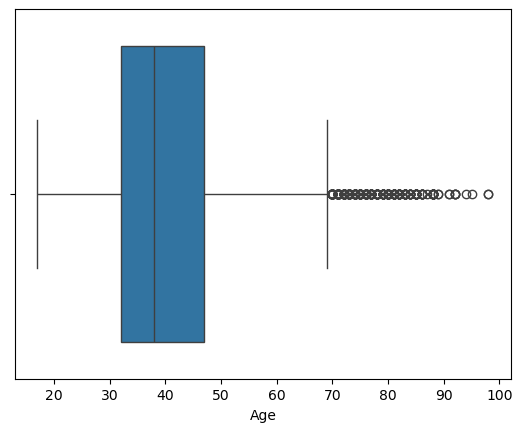

In [14]:
import seaborn as sns
sns.boxplot(x=customer.Age)

In [15]:
customer[customer.Age > 90]

Age      Job          Education  Default housing Loan   Contact Month  \
27826   95  retired           basic.6y       no      no   no  cellular   mar   
38022   91  retired  university.degree       no     yes  yes  cellular   sep   
38032   91  retired  university.degree       no      no  yes  cellular   sep   
38452   98  retired           basic.4y  unknown     yes   no  cellular   oct   
38455   98  retired           basic.4y  unknown     yes   no  cellular   oct   
38921   94  retired           basic.9y       no      no   no  cellular   nov   
39655   92  retired            unknown       no     yes   no  cellular   may   
39734   92  retired            unknown  unknown      no   no  cellular   may   
40450   92  retired            unknown       no      no  yes  cellular   aug   
40469   92  retired            unknown       no      no  yes  cellular   aug   

      day_of_week  duration  campaign  pdays  previous     poutcome  \
27826         thu        85         1    999         0  nonexistent   
38022         wed       837         1    999         2      failure   
38032         wed       223         2    999         0  nonexistent   
38452         fri       476         1      2         2      success   
38455         fri       272         2    999         0  nonexistent   
38921         wed       134         1    999         1      failure   
39655         thu       271         1      6         2      success   
39734         wed       405         3    999         1      failure   
40450         tue      1064         1      3         1      success   
40469         wed       370         1      3         4      success   

       empvarrate  conspriceidx  consconfidx  euribor3m  nremployed    y  
27826        -1.8        92.843        -50.0      1.650      5099.1   no  
38022        -3.4        92.379        -29.8      0.781      5017.5   no  
38032        -3.4        92.379        -29.8      0.781      5017.5   no  
38452        -3.4        92.431        -26.9      0.730      5017.5  yes  
38455        -3.4        92.431        -26.9      0.730      5017.5  yes  
38921        -3.4        92.649        -30.1      0.716      5017.5   no  
39655        -1.8        93.876        -40.0      0.683      5008.7   no  
39734        -1.8        93.876        -40.0      0.697      5008.7  yes  
40450        -1.7        94.027        -38.3      0.904      4991.6  yes  
40469        -1.7        94.027        -38.3      0.903      4991.6  yes

Dropping off customers with age above 90. 

In [17]:
customer = customer[customer['Age'] < 90]
customer.Age.value_counts()

Age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
86       8
84       7
17       5
89       2
87       1
Name: count, Length: 73, dtype: int64

In [18]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41178 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           41178 non-null  int64  
 1   Job           41178 non-null  object 
 2   Education     41178 non-null  object 
 3   Default       41178 non-null  object 
 4   housing       41178 non-null  object 
 5   Loan          41178 non-null  object 
 6   Contact       41178 non-null  object 
 7   Month         41178 non-null  object 
 8   day_of_week   41178 non-null  object 
 9   duration      41178 non-null  int64  
 10  campaign      41178 non-null  int64  
 11  pdays         41178 non-null  int64  
 12  previous      41178 non-null  int64  
 13  poutcome      41178 non-null  object 
 14  empvarrate    41178 non-null  float64
 15  conspriceidx  41178 non-null  float64
 16  consconfidx   41178 non-null  float64
 17  euribor3m     41178 non-null  float64
 18  nremployed    41178 non-null  f

Job Feature

In [20]:
customer.Job.value_counts()

Job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1710
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

<Axes: xlabel='Job'>

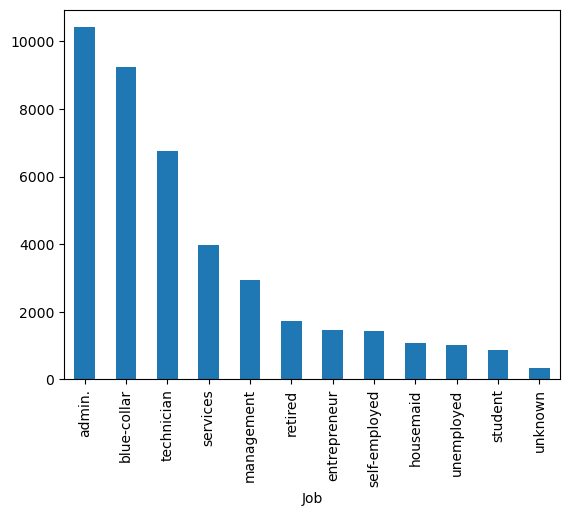

In [21]:
customer.Job.value_counts().plot(kind = 'bar')

In [22]:
# Dropping off Unknown 
customer = customer[customer['Job'] != 'unknown']
customer.Job.value_counts()

Job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1710
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

Education Feature


In [24]:
customer.Education.value_counts()

Education
university.degree      12121
high.school             9478
basic.9y                6013
professional.course     5231
basic.4y                4122
basic.6y                2269
unknown                 1596
illiterate                18
Name: count, dtype: int64

In [25]:
customer = customer[customer['Education'] != 'illiterate']
customer.Education.value_counts()

Education
university.degree      12121
high.school             9478
basic.9y                6013
professional.course     5231
basic.4y                4122
basic.6y                2269
unknown                 1596
Name: count, dtype: int64

<Axes: xlabel='Education'>

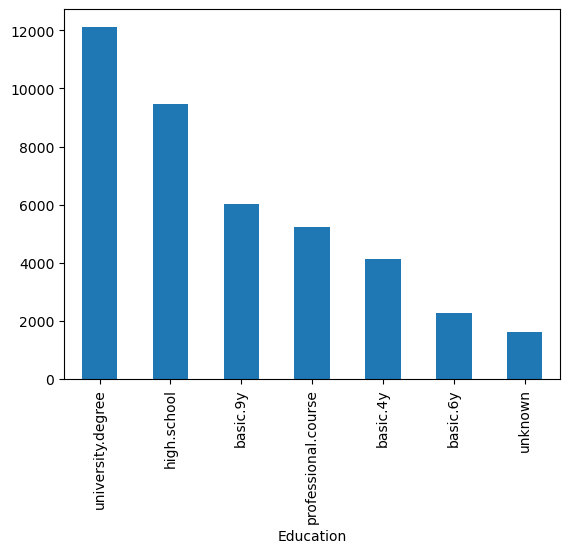

In [26]:
customer.Education.value_counts().plot(kind= 'bar')

Dropping off Education field

In [28]:
customer.drop('Education', axis=1, inplace=True)
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40830 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           40830 non-null  int64  
 1   Job           40830 non-null  object 
 2   Default       40830 non-null  object 
 3   housing       40830 non-null  object 
 4   Loan          40830 non-null  object 
 5   Contact       40830 non-null  object 
 6   Month         40830 non-null  object 
 7   day_of_week   40830 non-null  object 
 8   duration      40830 non-null  int64  
 9   campaign      40830 non-null  int64  
 10  pdays         40830 non-null  int64  
 11  previous      40830 non-null  int64  
 12  poutcome      40830 non-null  object 
 13  empvarrate    40830 non-null  float64
 14  conspriceidx  40830 non-null  float64
 15  consconfidx   40830 non-null  float64
 16  euribor3m     40830 non-null  float64
 17  nremployed    40830 non-null  float64
 18  y             40830 non-null  o

Checking the 'Deafult' feature in the Dataset 

In [30]:
customer.Default.value_counts()

Default
no         32392
unknown     8435
yes            3
Name: count, dtype: int64

Dropping off the 'yes' value

In [32]:
customer = customer[customer['Default'] != 'yes']
customer.Default.value_counts()

Default
no         32392
unknown     8435
Name: count, dtype: int64

In [33]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40827 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           40827 non-null  int64  
 1   Job           40827 non-null  object 
 2   Default       40827 non-null  object 
 3   housing       40827 non-null  object 
 4   Loan          40827 non-null  object 
 5   Contact       40827 non-null  object 
 6   Month         40827 non-null  object 
 7   day_of_week   40827 non-null  object 
 8   duration      40827 non-null  int64  
 9   campaign      40827 non-null  int64  
 10  pdays         40827 non-null  int64  
 11  previous      40827 non-null  int64  
 12  poutcome      40827 non-null  object 
 13  empvarrate    40827 non-null  float64
 14  conspriceidx  40827 non-null  float64
 15  consconfidx   40827 non-null  float64
 16  euribor3m     40827 non-null  float64
 17  nremployed    40827 non-null  float64
 18  y             40827 non-null  o

Checking the Feature 'housing Loan'

In [35]:
customer.housing.value_counts()

housing
yes        21389
no         18453
unknown      985
Name: count, dtype: int64

In [36]:
customer = customer[customer['housing'] != 'unknown']

In [37]:
customer.housing.value_counts()

housing
yes    21389
no     18453
Name: count, dtype: int64

Checking for Loan 

In [39]:
customer.Loan.value_counts()

Loan
no     33658
yes     6184
Name: count, dtype: int64

<Axes: xlabel='Loan'>

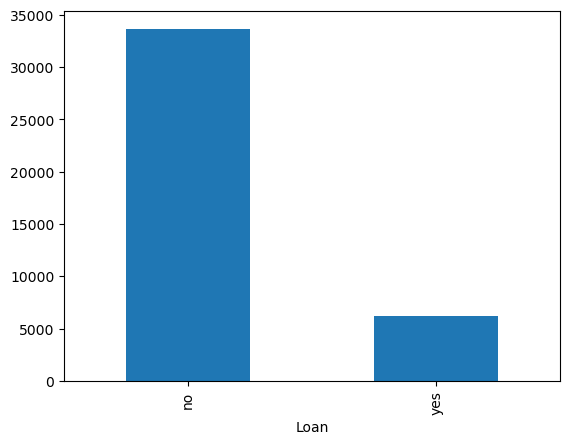

In [40]:
customer.Loan.value_counts().plot(kind ='bar')

In [41]:
customer = customer[customer['Loan'] != 'unkown']

In [42]:
customer.Loan.value_counts()

Loan
no     33658
yes     6184
Name: count, dtype: int64

Contact Feature 

<Axes: xlabel='Contact'>

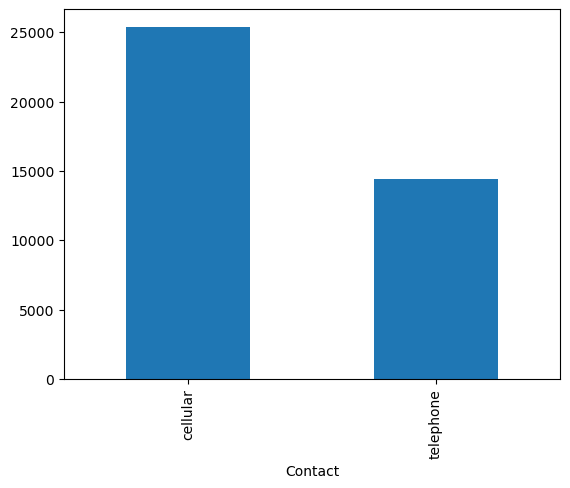

In [44]:
customer.Contact.value_counts().plot(kind='bar')

Dropping off The contact feature

In [46]:
customer.drop('Contact', axis=1, inplace=True)

In [47]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           39842 non-null  int64  
 1   Job           39842 non-null  object 
 2   Default       39842 non-null  object 
 3   housing       39842 non-null  object 
 4   Loan          39842 non-null  object 
 5   Month         39842 non-null  object 
 6   day_of_week   39842 non-null  object 
 7   duration      39842 non-null  int64  
 8   campaign      39842 non-null  int64  
 9   pdays         39842 non-null  int64  
 10  previous      39842 non-null  int64  
 11  poutcome      39842 non-null  object 
 12  empvarrate    39842 non-null  float64
 13  conspriceidx  39842 non-null  float64
 14  consconfidx   39842 non-null  float64
 15  euribor3m     39842 non-null  float64
 16  nremployed    39842 non-null  float64
 17  y             39842 non-null  object 
dtypes: float64(5), int64(5), object

Dropping off day_week from teh dataset

In [49]:
customer.drop('day_of_week', axis=1, inplace=True)

In [50]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           39842 non-null  int64  
 1   Job           39842 non-null  object 
 2   Default       39842 non-null  object 
 3   housing       39842 non-null  object 
 4   Loan          39842 non-null  object 
 5   Month         39842 non-null  object 
 6   duration      39842 non-null  int64  
 7   campaign      39842 non-null  int64  
 8   pdays         39842 non-null  int64  
 9   previous      39842 non-null  int64  
 10  poutcome      39842 non-null  object 
 11  empvarrate    39842 non-null  float64
 12  conspriceidx  39842 non-null  float64
 13  consconfidx   39842 non-null  float64
 14  euribor3m     39842 non-null  float64
 15  nremployed    39842 non-null  float64
 16  y             39842 non-null  object 
dtypes: float64(5), int64(5), object(7)
memory usage: 5.5+ MB


# Checking for Null Value in the Dataset

In [52]:
customer.isnull().sum()

Age             0
Job             0
Default         0
housing         0
Loan            0
Month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
empvarrate      0
conspriceidx    0
consconfidx     0
euribor3m       0
nremployed      0
y               0
dtype: int64

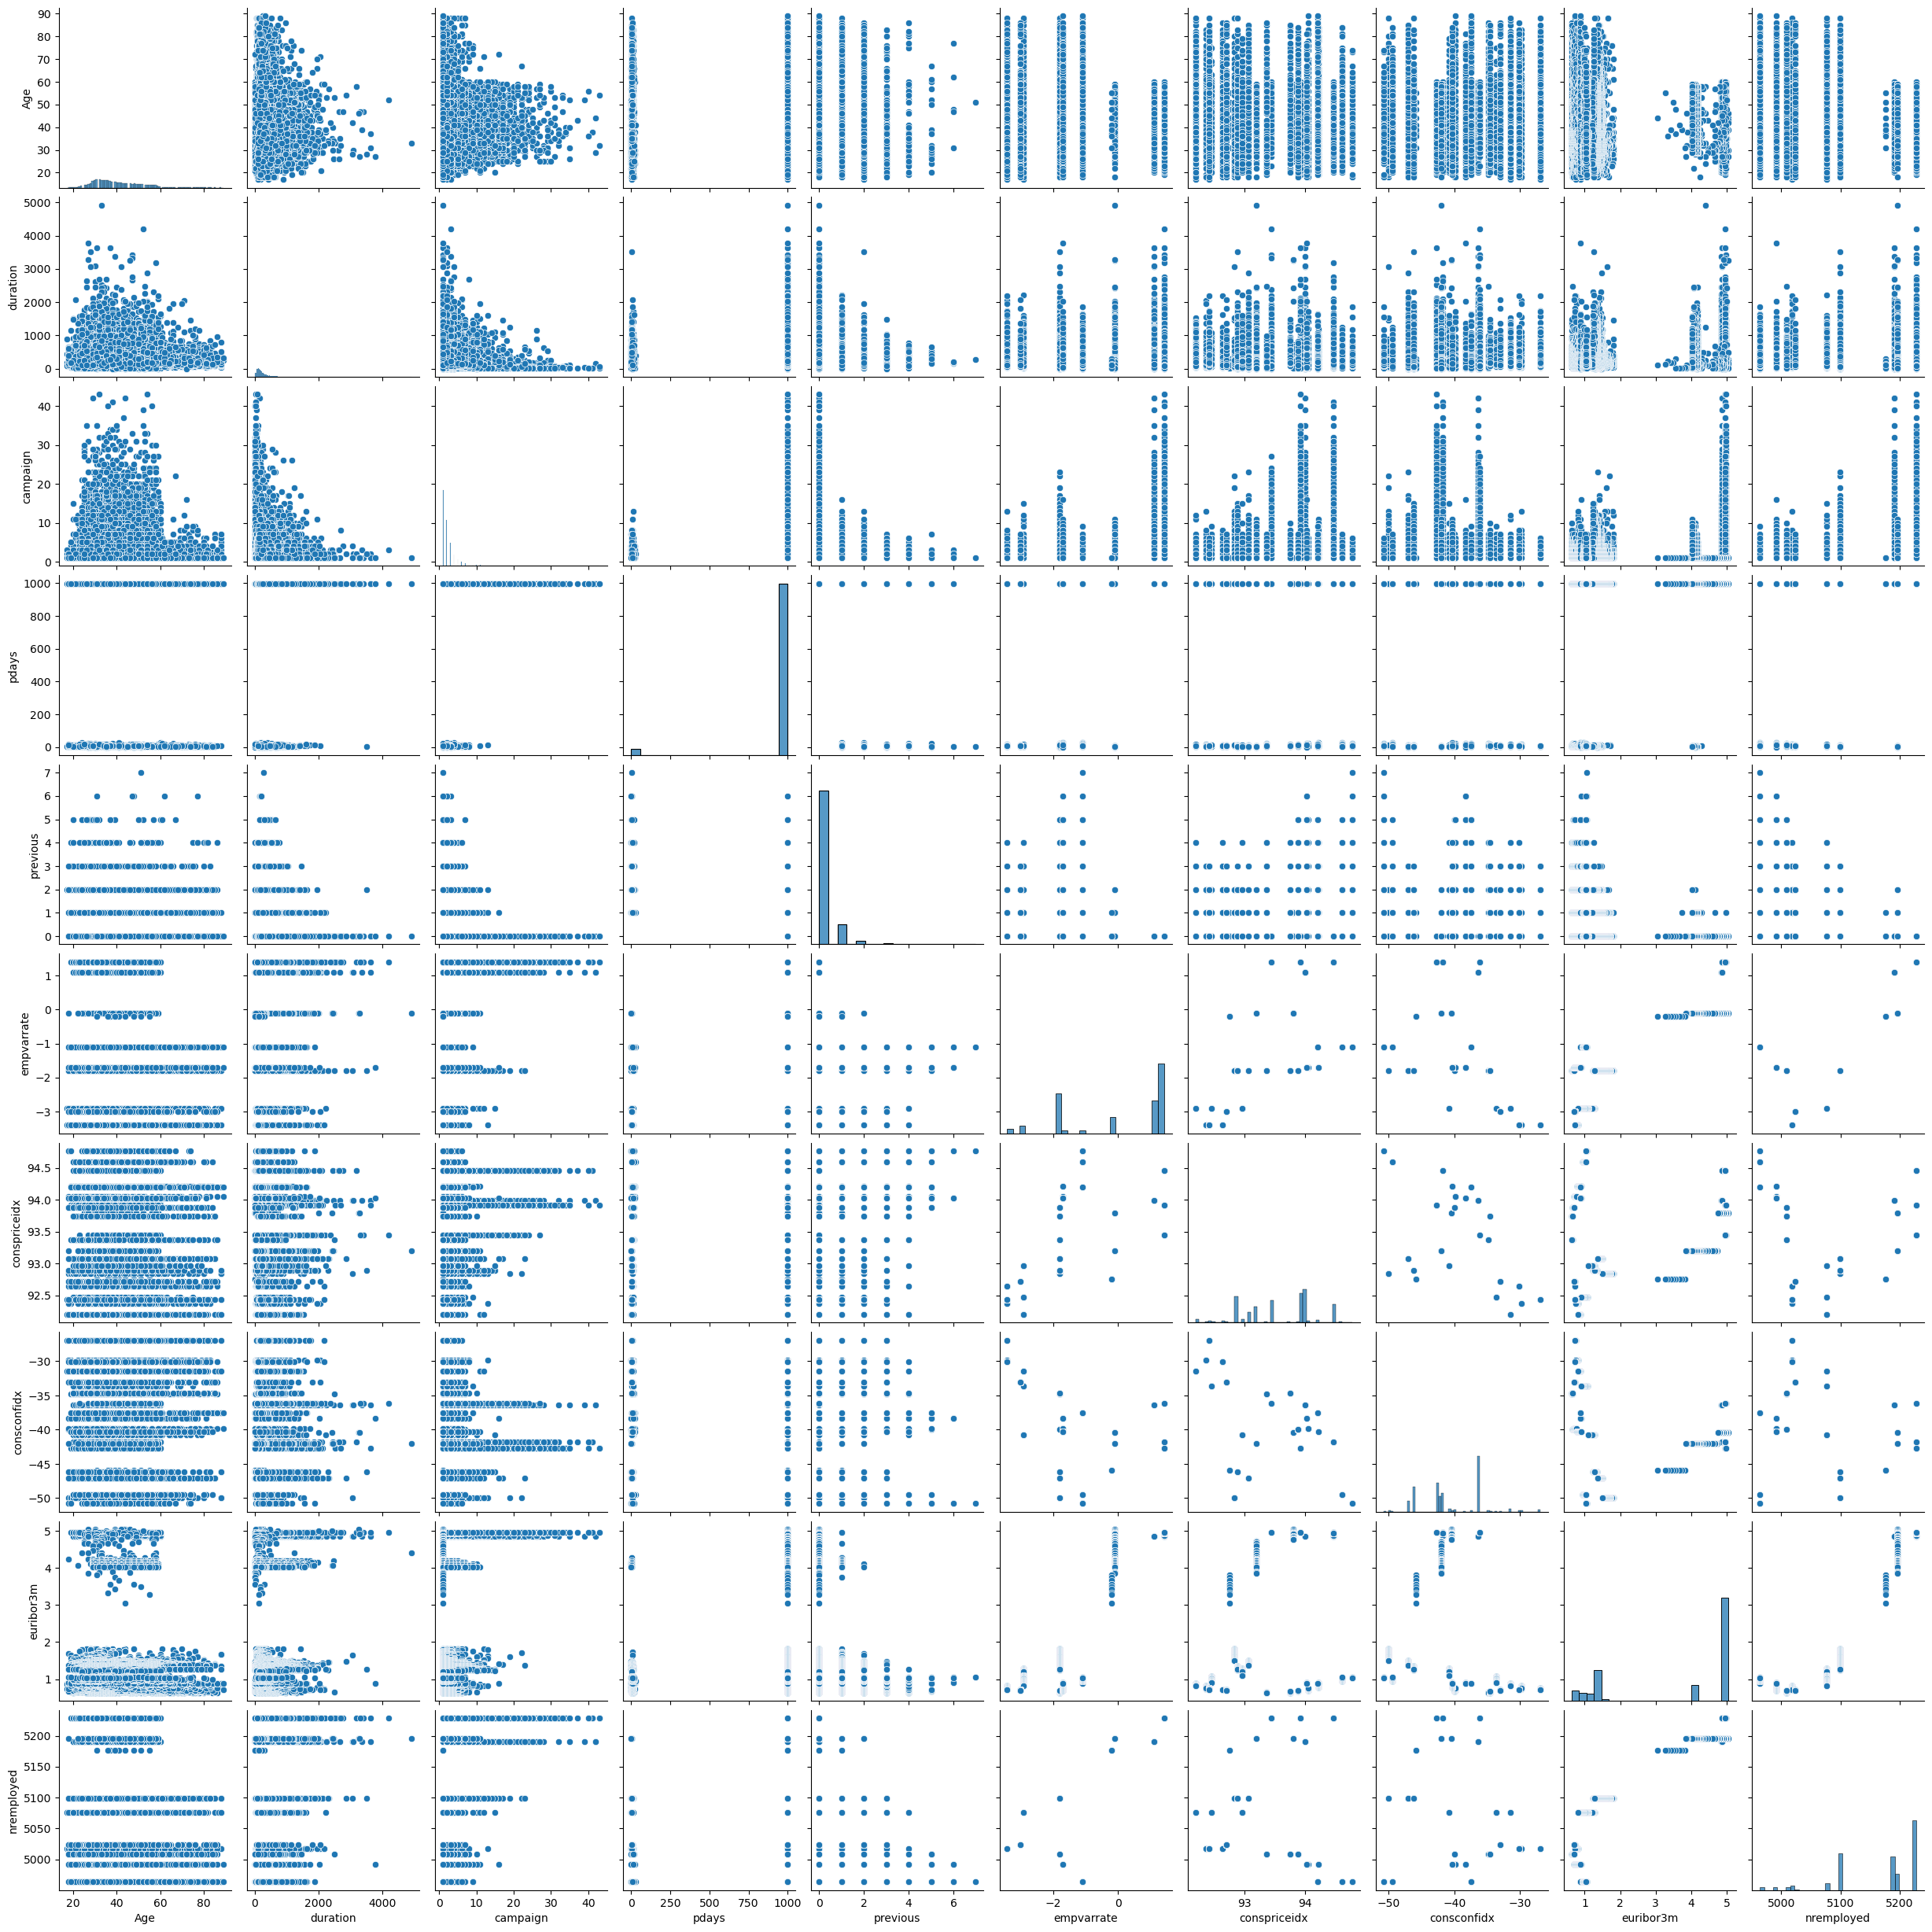

In [53]:
import seaborn as sns
sns.pairplot(customer)

Dropping off Pdays

In [55]:
customer.drop('pdays', axis=1, inplace=True)

In [56]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           39842 non-null  int64  
 1   Job           39842 non-null  object 
 2   Default       39842 non-null  object 
 3   housing       39842 non-null  object 
 4   Loan          39842 non-null  object 
 5   Month         39842 non-null  object 
 6   duration      39842 non-null  int64  
 7   campaign      39842 non-null  int64  
 8   previous      39842 non-null  int64  
 9   poutcome      39842 non-null  object 
 10  empvarrate    39842 non-null  float64
 11  conspriceidx  39842 non-null  float64
 12  consconfidx   39842 non-null  float64
 13  euribor3m     39842 non-null  float64
 14  nremployed    39842 non-null  float64
 15  y             39842 non-null  object 
dtypes: float64(5), int64(4), object(7)
memory usage: 5.2+ MB


In [57]:
customer.Month.value_counts()

Month
may    13298
jul     6970
aug     5980
jun     5081
nov     4013
apr     2563
oct      688
sep      544
mar      531
dec      174
Name: count, dtype: int64

Performing CHI-Squared test to determine if any relationship exists between Month and the Rate of Subscription of Term Deposit

In [59]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(customer['Month'], customer['y'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between month and term deposit subscription.")
else:
    print("No significant relationship found.")


Chi-Square Statistic: 2986.0003253131154
P-value: 0.0
There is a significant relationship between month and term deposit subscription.


Count of Subscription per month through EDA

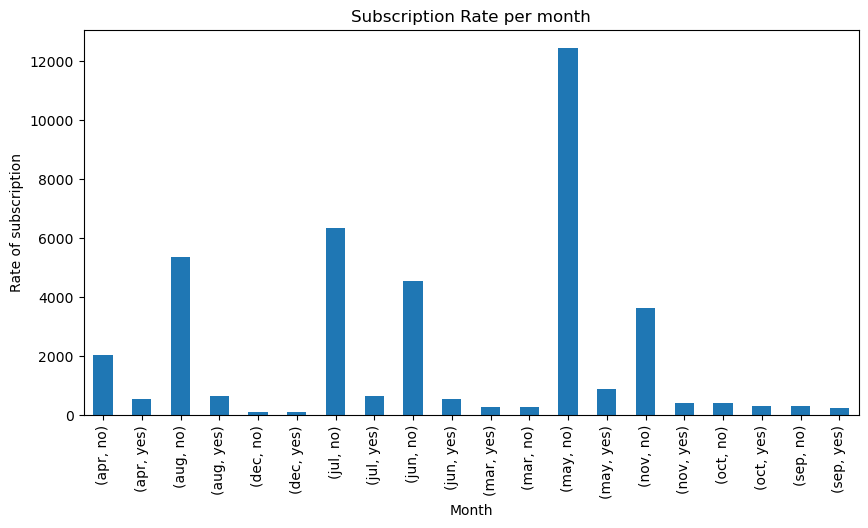

In [61]:
month_subs = customer.groupby('Month')['y'].value_counts()
# Plotiing the result
month_subs.plot(kind='bar',figsize=(10,5))
plt.title('Subscription Rate per month')
plt.xlabel('Month')
plt.ylabel('Rate of subscription')
# plt.legend(["Not Subscribed", "Subscribed"])
plt.show()

Statistical relation between subscription rate and Person Loan Disbursed

In [63]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table1 = pd.crosstab(customer['Loan'], customer['y'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f"Chi-Square Statistic: {chi2}") 
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Loan and term deposit subscription.")
else:
    print("No significant relationship found.")

Chi-Square Statistic: 0.8399616151928035
P-value: 0.3594077491240225
No significant relationship found.


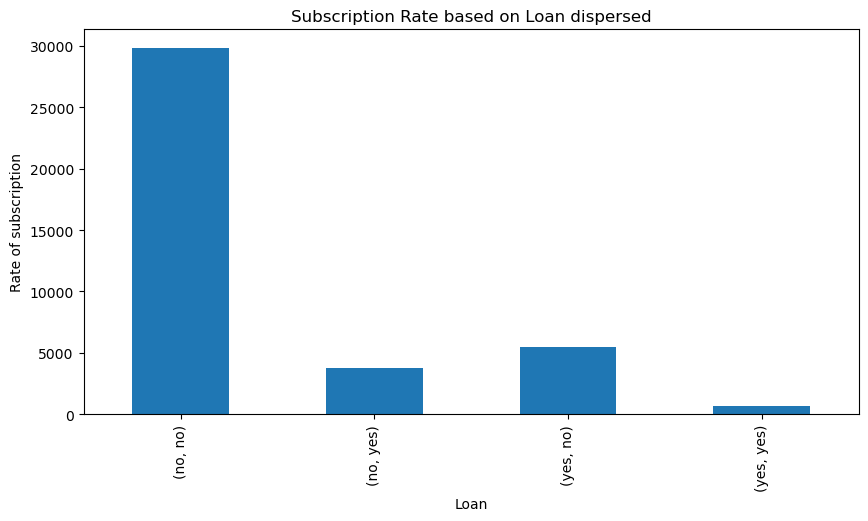

In [64]:
Loan_subs = customer.groupby('Loan')['y'].value_counts()
# Plotiing the result
Loan_subs.plot(kind='bar',figsize=(10,5))
plt.title('Subscription Rate based on Loan dispersed')
plt.xlabel('Loan')
plt.ylabel('Rate of subscription')
plt.show()

We dont find any relationship between loan disbursed and term deposit subscribed. 

In [66]:
customer.drop('Loan', axis=1, inplace=True)

In [67]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           39842 non-null  int64  
 1   Job           39842 non-null  object 
 2   Default       39842 non-null  object 
 3   housing       39842 non-null  object 
 4   Month         39842 non-null  object 
 5   duration      39842 non-null  int64  
 6   campaign      39842 non-null  int64  
 7   previous      39842 non-null  int64  
 8   poutcome      39842 non-null  object 
 9   empvarrate    39842 non-null  float64
 10  conspriceidx  39842 non-null  float64
 11  consconfidx   39842 non-null  float64
 12  euribor3m     39842 non-null  float64
 13  nremployed    39842 non-null  float64
 14  y             39842 non-null  object 
dtypes: float64(5), int64(4), object(6)
memory usage: 4.9+ MB


In [68]:
customer.poutcome.value_counts()

poutcome
nonexistent    34403
failure         4118
success         1321
Name: count, dtype: int64

Statistical relationship between poutcome and rate of term deposit subscription 

In [70]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table2 = pd.crosstab(customer['poutcome'], customer['y'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f"Chi-Square Statistic: {chi2}") 
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Loan and term deposit subscription.")
else:
    print("No significant relationship found.")

Chi-Square Statistic: 4089.3058053955147
P-value: 0.0
There is a significant relationship between Loan and term deposit subscription.


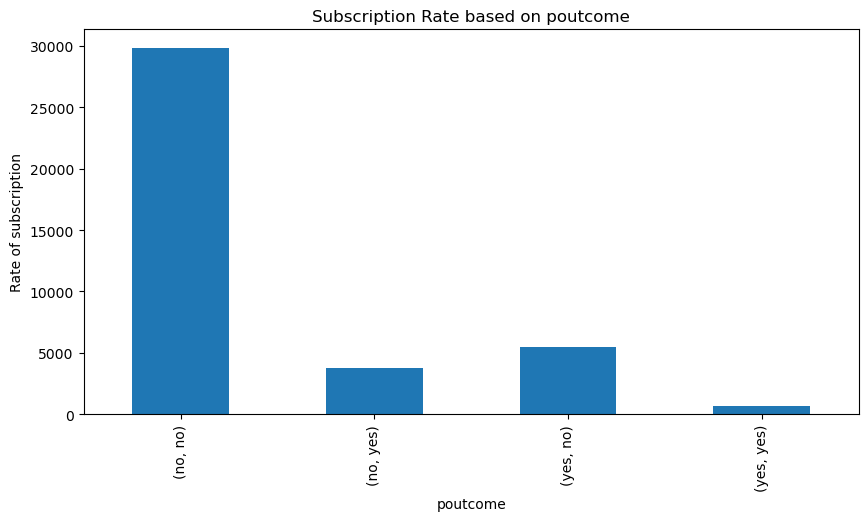

In [71]:
poutcome_subs = customer.groupby('poutcome')['y'].value_counts()
# Plotiing the result
Loan_subs.plot(kind='bar',figsize=(10,5))
plt.title('Subscription Rate based on poutcome')
plt.xlabel('poutcome')
plt.ylabel('Rate of subscription')
plt.show()

In [72]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table3 = pd.crosstab(customer['Job'], customer['y'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table3)

print(f"Chi-Square Statistic: {chi2}") 
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between Job and term deposit subscription.")
else:
    print("No significant relationship found.")

Chi-Square Statistic: 912.6646193446343
P-value: 1.1970844422004742e-189
There is a significant relationship between Job and term deposit subscription.


In [73]:
customer.Job.value_counts()

Job
admin.           10194
blue-collar       9006
technician        6594
services          3868
management        2853
retired           1663
entrepreneur      1418
self-employed     1378
housemaid         1030
unemployed         986
student            852
Name: count, dtype: int64

In [74]:
customer = customer.copy()
customer['admin'] = customer['Job'].apply(lambda x: 1 if 'admin.' in x else 0)
customer['blue-collar'] = customer['Job'].apply(lambda x: 1 if 'blue-collar' in x else 0)
customer['technician'] = customer['Job'].apply(lambda x: 1 if 'technician' in x else 0)
customer['services'] = customer['Job'].apply(lambda x: 1 if 'services' in x else 0)
customer['management'] = customer['Job'].apply(lambda x: 1 if 'management' in x else 0)
customer['retired'] = customer['Job'].apply(lambda x: 1 if 'retired' in x else 0)
customer['entrepreneur'] = customer['Job'].apply(lambda x: 1 if 'entrepreneur' in x else 0)
customer['self-employed'] = customer['Job'].apply(lambda x: 1 if 'self-employed' in x else 0)
customer['housemaid'] = customer['Job'].apply(lambda x: 1 if 'housemaid' in x else 0)
customer['unemployed'] = customer['Job'].apply(lambda x: 1 if 'unemployed' in x else 0)
customer['student'] = customer['Job'].apply(lambda x: 1 if 'student' in x else 0)

In [75]:
customer.head()

Age        Job  Default housing Month  duration  campaign  previous  \
0   56  housemaid       no      no   may       261         1         0   
1   57   services  unknown      no   may       149         1         0   
2   37   services       no     yes   may       226         1         0   
3   40     admin.       no      no   may       151         1         0   
4   56   services       no      no   may       307         1         0   

      poutcome  empvarrate  ...  blue-collar  technician  services  \
0  nonexistent         1.1  ...            0           0         0   
1  nonexistent         1.1  ...            0           0         1   
2  nonexistent         1.1  ...            0           0         1   
3  nonexistent         1.1  ...            0           0         0   
4  nonexistent         1.1  ...            0           0         1   

   management retired  entrepreneur  self-employed  housemaid  unemployed  \
0           0       0             0              0          1           0   
1           0       0             0              0          0           0   
2           0       0             0              0          0           0   
3           0       0             0              0          0           0   
4           0       0             0              0          0           0   

   student  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 26 columns]

Dropping off Job column 


In [77]:
customer.drop('Job', axis=1, inplace=True)

In [78]:
customer.head()

Age  Default housing Month  duration  campaign  previous     poutcome  \
0   56       no      no   may       261         1         0  nonexistent   
1   57  unknown      no   may       149         1         0  nonexistent   
2   37       no     yes   may       226         1         0  nonexistent   
3   40       no      no   may       151         1         0  nonexistent   
4   56       no      no   may       307         1         0  nonexistent   

   empvarrate  conspriceidx  ...  blue-collar  technician  services  \
0         1.1        93.994  ...            0           0         0   
1         1.1        93.994  ...            0           0         1   
2         1.1        93.994  ...            0           0         1   
3         1.1        93.994  ...            0           0         0   
4         1.1        93.994  ...            0           0         1   

  management  retired  entrepreneur  self-employed  housemaid  unemployed  \
0          0        0             0              0          1           0   
1          0        0             0              0          0           0   
2          0        0             0              0          0           0   
3          0        0             0              0          0           0   
4          0        0             0              0          0           0   

   student  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 25 columns]

In [79]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            39842 non-null  int64  
 1   Default        39842 non-null  object 
 2   housing        39842 non-null  object 
 3   Month          39842 non-null  object 
 4   duration       39842 non-null  int64  
 5   campaign       39842 non-null  int64  
 6   previous       39842 non-null  int64  
 7   poutcome       39842 non-null  object 
 8   empvarrate     39842 non-null  float64
 9   conspriceidx   39842 non-null  float64
 10  consconfidx    39842 non-null  float64
 11  euribor3m      39842 non-null  float64
 12  nremployed     39842 non-null  float64
 13  y              39842 non-null  object 
 14  admin          39842 non-null  int64  
 15  blue-collar    39842 non-null  int64  
 16  technician     39842 non-null  int64  
 17  services       39842 non-null  int64  
 18  management 

# Creating the input feature and output feature from the dataset 

In [81]:
X = customer.drop(columns=['y'])
Y = customer['y']

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            39842 non-null  int64  
 1   Default        39842 non-null  object 
 2   housing        39842 non-null  object 
 3   Month          39842 non-null  object 
 4   duration       39842 non-null  int64  
 5   campaign       39842 non-null  int64  
 6   previous       39842 non-null  int64  
 7   poutcome       39842 non-null  object 
 8   empvarrate     39842 non-null  float64
 9   conspriceidx   39842 non-null  float64
 10  consconfidx    39842 non-null  float64
 11  euribor3m      39842 non-null  float64
 12  nremployed     39842 non-null  float64
 13  admin          39842 non-null  int64  
 14  blue-collar    39842 non-null  int64  
 15  technician     39842 non-null  int64  
 16  services       39842 non-null  int64  
 17  management     39842 non-null  int64  
 18  retired    

In [83]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 39842 entries, 0 to 41187
Series name: y
Non-Null Count  Dtype 
--------------  ----- 
39842 non-null  object
dtypes: object(1)
memory usage: 622.5+ KB


In [84]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 39842, dtype: object

# Splitting into Test and Train dataset 

## Label Encoding the Y dataset (output)

In [87]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Encode target variable using LabelEncoder 
le = LabelEncoder()
y_encoded = le.fit_transform(Y)  # Now y_encoded is a 1D array

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# Applying Classification Machine Learning Algorithm along with One Hot Encoding of the dataset

## Logistic Regression 

In [151]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix

step1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'),[1,2,3,7])], remainder='passthrough')
step2 = LogisticRegression(random_state=0)

pipe = Pipeline([ ('step1', step1),
                ('step2',step2)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('Confusion Matrix:' , confusion_matrix(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

Confusion Matrix: [[8604  218]
 [ 719  420]]
accuracy_score: 0.9059331392430479


C:\Users\nsany\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## To determine the the accuracy score as to be acceptable or not we do a classification report for Precession Call and 
## Classification Report

In [152]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8822
           1       0.66      0.37      0.47      1139

    accuracy                           0.91      9961
   macro avg       0.79      0.67      0.71      9961
weighted avg       0.89      0.91      0.89      9961



## Key Observations on the Logistic Regression Model 

1️⃣ Class Imbalance Problem
We have much more data for Class 0 (8822 samples) than for Class 1 (1139 samples).
The model is biased towards Class 0, leading to poor recall for Class 1.
2️⃣ Precision vs. Recall
Class 0 (Majority Class)

High precision (0.92) → Most of the predicted 0s were actually 0.
High recall (0.98) → The model found nearly all actual 0s.
Great performance on this class ✅
Class 1 (Minority Class)

Lower precision (0.66) → 34% of the time, when the model predicted "1", it was wrong.
Very low recall (0.37) → The model missed 63% of actual Class 1 cases! ⚠️
F1-score (0.47) is quite low, meaning poor performance on Class 1.
3️⃣ Accuracy Might Be Misleading
Overall accuracy is 91%, but that's mainly because the model is very good at predicting Class 0.
However, it struggles to detect Class 1, which could be a problem if Class 1 is important (e.g., fraud detection, medical diagnosis).

# Since the Logistic Regression Model is heavily biased towards class '0' we will check other ML models

## Decision Trees Classification 

In [158]:
from sklearn.tree import DecisionTreeClassifier
step3 = DecisionTreeClassifier(random_state=0)

pipe = Pipeline([ ('step1', step1),
                ('step3',step3)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('Confusion Matrix:' , confusion_matrix(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

Confusion Matrix: [[8231  591]
 [ 567  572]]
accuracy_score: 0.8837466117859653


## Classification Report

In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      8822
           1       0.49      0.50      0.50      1139

    accuracy                           0.88      9961
   macro avg       0.71      0.72      0.72      9961
weighted avg       0.88      0.88      0.88      9961



## Key Observations on the Decision Tree Classification Model 

✅ Decision Tree Strengths

Better recall for Class 1 (0.37 vs. 0.50) → The Decision Tree captures more actual Class 1 cases.
Better F1-score for Class 1 (0.47 vs. 0.50) → More balanced performance on Class 1.

Better Model: 
Since we are into identifying the class 1 we will consider Decision Tree over Logistic Regression as Recall for DT is 0.50 which means Decision Tree Model predicts more number of correct Class 1. 

## Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

step4 = RandomForestClassifier(random_state=0)

pipe = Pipeline([ ('step1', step1),
                ('step4',step4)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('Confusion Matrix:' , confusion_matrix(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

Confusion Matrix: [[8509  313]
 [ 559  580]]
accuracy_score: 0.9124585884951311


## Classification Report

In [168]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8822
           1       0.65      0.51      0.57      1139

    accuracy                           0.91      9961
   macro avg       0.79      0.74      0.76      9961
weighted avg       0.91      0.91      0.91      9961



✅ RandomForestClassifier Strengths

Better recall for Class 1 (0.50 vs. 0.51) → The RandomForestClassifier captures more actual Class 1 cases.
Better F1-score for Class 1 (0.50 vs. 0.57) → More balanced performance on Class 1.

Better Model: 
Since we are into identifying the class 1 we will consider RandomForestClassifier over Decision Tree as Recall for Random Forest is 0.51 
which means RandomForestClassifier Model predicts more number of correct Class 1. 
Precision of Class 1 is almost comparable to that of Logistic Regression 

## Support Vector Machine Classification (SVM) Model

In [170]:
from sklearn.svm import SVC
step5 = SVC(random_state=0)

pipe = Pipeline([ ('step1', step1),
                ('step5',step5)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# print('Confusion Matrix:' , confusion_matrix(y_test, y_pred))
print('accuracy_score:', accuracy_score(y_test, y_pred))

accuracy_score: 0.8879630559180806


## Classification Report for SVM 

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8822
           1       0.65      0.04      0.08      1139

    accuracy                           0.89      9961
   macro avg       0.77      0.52      0.51      9961
weighted avg       0.86      0.89      0.84      9961



## K Nearest Neighbour Classification ML Model 

In [175]:
from sklearn.neighbors import KNeighborsClassifier
step6 = KNeighborsClassifier(n_neighbors=5)

pipe = Pipeline([ ('step1', step1),
                ('step6',step6)
                ])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred))  # Checking the accuracy Score

accuracy_score: 0.8994076899909648


## Classification Report for KNN Model. 

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      8822
           1       0.57      0.46      0.51      1139

    accuracy                           0.90      9961
   macro avg       0.75      0.71      0.73      9961
weighted avg       0.89      0.90      0.89      9961



✅ K-Nearest Neighbour Classifier
We find this model has lower precision for Class 1 Hence we will not consider this Model as the final model selection

In [182]:
customer.head()

Age  Default housing Month  duration  campaign  previous     poutcome  \
0   56       no      no   may       261         1         0  nonexistent   
1   57  unknown      no   may       149         1         0  nonexistent   
2   37       no     yes   may       226         1         0  nonexistent   
3   40       no      no   may       151         1         0  nonexistent   
4   56       no      no   may       307         1         0  nonexistent   

   empvarrate  conspriceidx  ...  blue-collar  technician  services  \
0         1.1        93.994  ...            0           0         0   
1         1.1        93.994  ...            0           0         1   
2         1.1        93.994  ...            0           0         1   
3         1.1        93.994  ...            0           0         0   
4         1.1        93.994  ...            0           0         1   

  management  retired  entrepreneur  self-employed  housemaid  unemployed  \
0          0        0             0              0          1           0   
1          0        0             0              0          0           0   
2          0        0             0              0          0           0   
3          0        0             0              0          0           0   
4          0        0             0              0          0           0   

   student  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 25 columns]

In [184]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            39842 non-null  int64  
 1   Default        39842 non-null  object 
 2   housing        39842 non-null  object 
 3   Month          39842 non-null  object 
 4   duration       39842 non-null  int64  
 5   campaign       39842 non-null  int64  
 6   previous       39842 non-null  int64  
 7   poutcome       39842 non-null  object 
 8   empvarrate     39842 non-null  float64
 9   conspriceidx   39842 non-null  float64
 10  consconfidx    39842 non-null  float64
 11  euribor3m      39842 non-null  float64
 12  nremployed     39842 non-null  float64
 13  y              39842 non-null  object 
 14  admin          39842 non-null  int64  
 15  blue-collar    39842 non-null  int64  
 16  technician     39842 non-null  int64  
 17  services       39842 non-null  int64  
 18  management 

## Reordering the output column 'y' from 12th position to 23rd position`

In [188]:
# Move column at index 13 (Python index 12) to the last position
col_to_move = customer.columns[12]  # Get the column name at index 12
remaining_cols = [col for col in customer.columns if col != col_to_move]  # Keep other columns

# Reorder DataFrame
customer = customer[remaining_cols + [col_to_move]]

In [190]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            39842 non-null  int64  
 1   Default        39842 non-null  object 
 2   housing        39842 non-null  object 
 3   Month          39842 non-null  object 
 4   duration       39842 non-null  int64  
 5   campaign       39842 non-null  int64  
 6   previous       39842 non-null  int64  
 7   poutcome       39842 non-null  object 
 8   empvarrate     39842 non-null  float64
 9   conspriceidx   39842 non-null  float64
 10  consconfidx    39842 non-null  float64
 11  euribor3m      39842 non-null  float64
 12  admin          39842 non-null  int64  
 13  blue-collar    39842 non-null  int64  
 14  technician     39842 non-null  int64  
 15  services       39842 non-null  int64  
 16  management     39842 non-null  int64  
 17  retired        39842 non-null  int64  
 18  entrepreneu

# Predicting Using Random Forest ML Model

In [153]:
customer = customer.rename(columns={"blue-collar":"blue_collar"})

In [155]:
customer = customer.rename(columns={"self-employed":"self_employed"})
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39842 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            39842 non-null  int64  
 1   Default        39842 non-null  object 
 2   housing        39842 non-null  object 
 3   Month          39842 non-null  object 
 4   duration       39842 non-null  int64  
 5   campaign       39842 non-null  int64  
 6   previous       39842 non-null  int64  
 7   poutcome       39842 non-null  object 
 8   empvarrate     39842 non-null  float64
 9   conspriceidx   39842 non-null  float64
 10  consconfidx    39842 non-null  float64
 11  euribor3m      39842 non-null  float64
 12  nremployed     39842 non-null  float64
 13  y              39842 non-null  object 
 14  admin          39842 non-null  int64  
 15  blue_collar    39842 non-null  int64  
 16  technician     39842 non-null  int64  
 17  services       39842 non-null  int64  
 18  management 

# Exporting the Random Forest Model for prediction

In [157]:
from sklearn.ensemble import RandomForestClassifier

step4 = RandomForestClassifier(random_state=0)

pipe = Pipeline([ ('step1', step1),
                ('step4',step4)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [159]:
import numpy as np 
def predict_Subscription(Age, 
                         Default,         
                         housing,        
                         Month,       
                         duration, 
                         campaign, 
                         previous, 
                         poutcome,
                         empvarrate,
                         conspriceidx,
                         consconfidx, 
                         euribor3m, 
                         admin, 
                         blue_collar,
                         technician,       
                         services,
                         management,
                         retired, 
                         entrepreneur,  
                         self_employed,    
                         housemaid,        
                         unemployed,       
                         student, 
                         nremployed     ): 
         arr = np.array([Age, 
                         Default,         
                         housing,        
                         Month,       
                         duration, 
                         campaign, 
                         previous, 
                         poutcome,
                         empvarrate,
                         conspriceidx,
                         consconfidx, 
                         euribor3m, 
                         admin, 
                         blue_collar,
                         technician,       
                         services,
                         management,
                         retired, 
                         entrepreneur,  
                         self_employed,    
                         housemaid,        
                         unemployed,       
                         student, 
                         nremployed ])
         # Ensure categorical columns are strings
         categorical_cols = ['Default', 'housing', 'Month', 'poutcome']
         customer[categorical_cols] = customer[categorical_cols].astype(str)

         k = arr.reshape(1,24)
         prediction = pipe.predict(k)

         return(prediction)

In [161]:
predict_Subscription( Age = 42, 
                         Default = 0,         
                         housing = 0,        
                         Month = 'May',       
                         duration = 1623, 
                         campaign = 1, 
                         previous = 0, 
                         poutcome = 'nonexistent',
                         empvarrate = 1.1,
                         conspriceidx = 93.994,
                         consconfidx = -37, 
                         euribor3m = 4.9, 
                         admin = 0, 
                         blue_collar = 0,
                         technician = 1,       
                         services = 0,
                         management = 0,
                         retired = 0, 
                         entrepreneur = 0,  
                         self_employed = 0,    
                         housemaid = 0,        
                         unemployed = 0,       
                         student = 0, 
                         nremployed = 0
)

C:\Users\nsany\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\nsany\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([1])